In [0]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
start = datetime.datetime(2012,1,1)
end= datetime.datetime(2018,8,30)
yf.pdr_override()
df_full = yf.download("jpm",start = start,end=end).reset_index()
df_full.to_csv('jpm.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,34.060001,35.189999,34.009998,34.980000,27.864342,44102800
1,2012-01-04,34.439999,35.150002,34.330002,34.950001,28.040850,36571200
2,2012-01-05,34.709999,35.919998,34.400002,35.680000,28.626539,38381400
3,2012-01-06,35.689999,35.770000,35.139999,35.360001,28.369787,33160600
4,2012-01-09,35.439999,35.680000,34.990002,35.299999,28.321667,23001800


In [6]:
import pandas as pd
df = pd.read_csv('jpm.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,34.060001,35.189999,34.009998,34.980000,27.864342,44102800
1,2012-01-04,34.439999,35.150002,34.330002,34.950001,28.040850,36571200
2,2012-01-05,34.709999,35.919998,34.400002,35.680000,28.626539,38381400
3,2012-01-06,35.689999,35.770000,35.139999,35.360001,28.369787,33160600
4,2012-01-09,35.439999,35.680000,34.990002,35.299999,28.321667,23001800
...,...,...,...,...,...,...,...
1671,2018-08-23,114.959999,115.150002,114.430000,114.730003,109.777924,9265400
1672,2018-08-24,114.980003,115.220001,114.449997,114.680000,109.730087,8845700
1673,2018-08-27,115.220001,117.279999,115.169998,116.709999,111.672455,13768000
1674,2018-08-28,117.000000,117.029999,115.970001,116.139999,111.127060,8302600


In [7]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1671    105.630344
1672    105.676721
1673    105.728722
1674    105.801820
1675    105.858816
Name: Adj Close, Length: 1676, dtype: float64

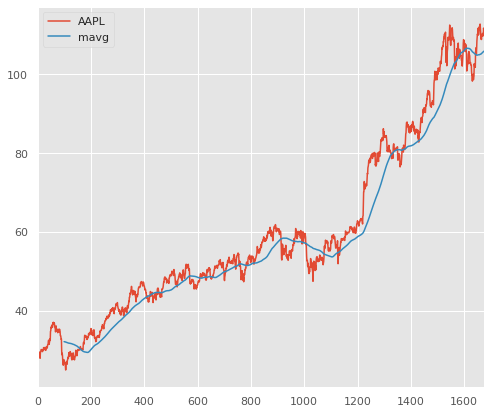

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [9]:
dfcomp = yf.download(['jpm','AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],start = start,end=end)['Adj Close']
dfcomp

[*********************100%***********************]  6 of 6 completed


,AAPL,GE,GOOG,IBM,JPM,MSFT
Date,,,,,,
2012-01-03,50.994907,13.639091,331.462585,139.934006,27.864342,22.020796
2012-01-04,51.268970,13.787668,332.892242,139.363144,28.040850,22.539021
2012-01-05,51.838169,13.780239,328.274536,138.702209,28.626539,22.769344
2012-01-06,52.380054,13.854527,323.796326,137.109772,28.369787,23.123066
2012-01-09,52.296970,14.010525,310.067780,136.396225,28.321667,22.818701
...,...,...,...,...,...,...
2018-08-23,211.061111,11.874558,1205.380005,135.556732,109.777924,105.249374
2018-08-24,211.717331,11.836680,1220.650024,136.181503,109.730087,106.071335
2018-08-27,213.460739,12.092353,1241.819946,136.787628,111.672455,107.245552


In [10]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

,AAPL,GE,GOOG,IBM,JPM,MSFT
AAPL,1.000000,0.231933,0.358248,0.284489,0.302823,0.361851
GE,0.231933,1.000000,0.311084,0.413162,0.469752,0.313180
GOOG,0.358248,0.311084,1.000000,0.338729,0.365240,0.486786
IBM,0.284489,0.413162,0.338729,1.000000,0.428698,0.408897
JPM,0.302823,0.469752,0.365240,0.428698,1.000000,0.423728
MSFT,0.361851,0.313180,0.486786,0.408897,0.423728,1.000000


In [0]:
import math
import numpy as np
from sklearn import preprocessing
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High']-df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close']-df['Open']) / df['Open'] * 100.0
dfreg.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
clflasso = Lasso()
clflasso.fit(X_train, y_train)
confidencelasso = clflasso.score(X_test,y_test)

In [16]:
print("The Accuracy of our Model is %r" %confidencelasso)

The Accuracy of our Model is 0.9806857462238061


In [18]:
forecast_set =clflasso.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([111.34130043, 111.5623028 , 110.72433671, 109.66539761,
       107.97107304, 108.67090898, 107.79611405, 108.78140282,
       108.78140282, 108.64327267, 109.28785802, 108.96556167,
       108.74456664, 108.6985306 , 110.56779948, 110.04292987,
       109.69301924])

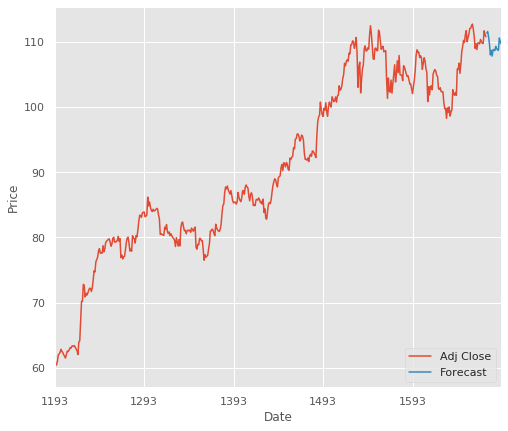

In [19]:
next_unix =  datetime.datetime.now() + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()